In [1]:
!pip install -U instructor

INFO: pip is looking at multiple versions of pydantic to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 6.7 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of pydantic to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.6/174.6 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.6/158.6 kB 11

In [58]:
!sudo apt-get install --reinstall xdg-utils -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libauthen-sasl-perl libdata-dump-perl libencode-locale-perl
  libfile-basedir-perl libfile-desktopentry-perl libfile-listing-perl
  libfile-mimeinfo-perl libfont-afm-perl libfontenc1 libhtml-form-perl
  libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl
  libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-message-perl libhttp-negotiate-perl libio-html-perl
  libio-socket-ssl-perl libio-stringy-perl libipc-system-simple-perl
  liblwp-mediatypes-perl liblwp-protocol-https-perl libmailtools-perl
  libnet-dbus-perl libnet-http-perl libnet-smtp-ssl-perl libnet-ssleay-perl
  libtext-iconv-perl libtie-ixhash-perl libtimedate-perl libtry-tiny-perl
  liburi-perl libwww-perl libwww-robotrules-perl libx11-protocol-perl
  libxkbfile1 libxml-parser-perl libxml-twig-perl libxml-xpathengine-perl
  libxv1 lib

In [54]:
!pip install -qq graphviz

In [3]:
!pip install anthropic mistralai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.1/869.1 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 95.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 26.7 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.27.0
    Uninstalling httpx-0.27.0:
      Successfully uninstalled httpx-0.27.0


In [12]:
api_key=''

In [50]:
import instructor

from pydantic import BaseModel
from mistralai.client import MistralClient

client = MistralClient(api_key=api_key)

patched_chat = instructor.patch(create=client.chat, mode=instructor.Mode.JSON_SCHEMA)

class UserDetails(BaseModel):
    name: str
    age: int

resp = patched_chat(
    model="mistral-large-latest",
    response_model=UserDetails,
    messages=[
        {
            "role": "user",
            "content": f'Extract the following entities: "Jason is 20"',
        },
    ],
)
print(resp)
#> name='Jason' age=20

name='Jason' age=20


In [51]:
from pydantic import BaseModel, Field
from typing import List


class Node(BaseModel):
    id: int
    label: str
    color: str


class Edge(BaseModel):
    source: int
    target: int
    label: str
    color: str = "black"


class KnowledgeGraph(BaseModel):
    nodes: List[Node] = Field(..., default_factory=list)
    edges: List[Edge] = Field(..., default_factory=list)

In [52]:



def generate_graph(input) -> KnowledgeGraph:
    return patched_chat(
        model="mistral-large-latest",
        messages=[
            {
                "role": "user",
                "content": f"Help me understand the following by describing it as a detailed knowledge graph: {input}",
            }
        ],
        response_model=KnowledgeGraph,
    )  # type: ignore

In [79]:
graph = generate_graph("Teach me about quantum mechanics")


In [70]:
import graphviz
graphviz.set_jupyter_format('svg')

'svg'

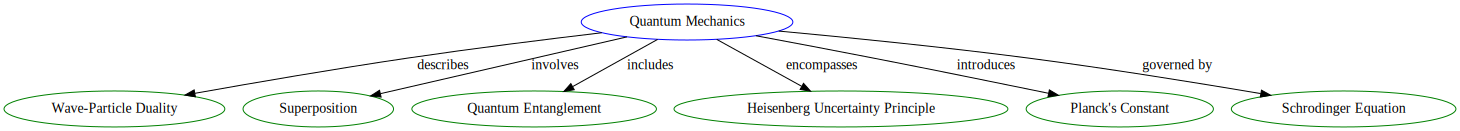

In [80]:
from graphviz import Digraph


def visualize_knowledge_graph(kg: KnowledgeGraph):
    dot = Digraph(comment="Knowledge Graph")

    # Add nodes
    for node in kg.nodes:
        dot.node(str(node.id), node.label, color=node.color)

    # Add edges
    for edge in kg.edges:
        dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)

    # Render the graph
    dot.format = 'svg'
    return dot

visualize_knowledge_graph(graph)

In [81]:
text_chunks = [
    "Jason knows a lot about quantum mechanics. He is a physicist. He is a professor",
    "Professors are smart.",
    "Sarah knows Jason and is a student of his.",
    "Sarah is a student at the University of Toronto. and UofT is in Canada",
]

In [89]:
from typing import Optional
class KnowledgeGraph(BaseModel):
    nodes: Optional[List[Node]] = Field(..., default_factory=list)
    edges: Optional[List[Edge]] = Field(..., default_factory=list)

    def update(self, other: "KnowledgeGraph") -> "KnowledgeGraph":
        """Updates the current graph with the other graph, deduplicating nodes and edges."""
        return KnowledgeGraph(
            nodes=list(self.nodes + other.nodes),
            edges=list(self.edges + other.edges),
        )

    def draw(self, prefix: str = None):
        dot = Digraph(comment="Knowledge Graph")

        for node in self.nodes:  
            dot.node(str(node.id), node.label, color=node.color)

        for edge in self.edges:  
            dot.edge(
                str(edge.source), str(edge.target), label=edge.label, color=edge.color
            )
        dot.render(prefix, format="png")
        return dot

In [90]:



def generate_graph(input: List[str]) -> KnowledgeGraph:
    cur_state = KnowledgeGraph()  
    num_iterations = len(input)
    for i, inp in enumerate(input):
        new_updates = patched_chat(
            model="mistral-large-latest",
            messages=[
                {
                    "role": "system",
                    "content": """You are an iterative knowledge graph builder.
                    You are given the current state of the graph, and you must append the nodes and edges
                    to it Do not procide any duplcates and try to reuse nodes as much as possible.""",
                },
                {
                    "role": "user",
                    "content": f"""Extract any new nodes and edges from the following:
                    # Part {i}/{num_iterations} of the input:

                    {inp}""",
                },
                {
                    "role": "user",
                    "content": f"""Here is the current state of the graph:
                    {cur_state.model_dump_json(indent=2)}""",
                },  
            ],
            response_model=KnowledgeGraph,
        )  # type: ignore

        # Update the current state
        cur_state = cur_state.update(new_updates)  
        cur_state.draw(prefix=f"iteration_{i}")
    return cur_state

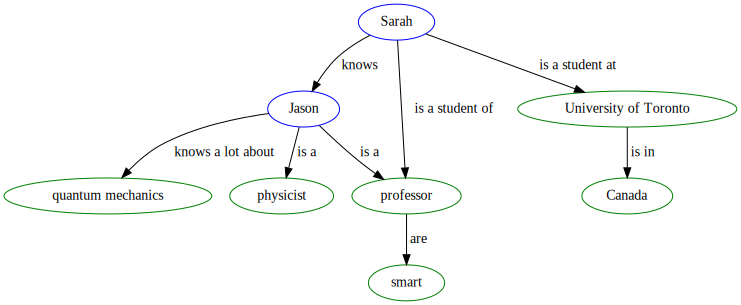

In [91]:
graph: KnowledgeGraph = generate_graph(text_chunks)
graph.draw(prefix="final")

In [92]:
import enum
from typing import List
from pydantic import Field, BaseModel


class QueryType(str, enum.Enum):
    """Enumeration representing the types of queries that can be asked to a question answer system."""

    SINGLE_QUESTION = "SINGLE"
    MERGE_MULTIPLE_RESPONSES = "MERGE_MULTIPLE_RESPONSES"


class Query(BaseModel):
    """Class representing a single question in a query plan."""

    id: int = Field(..., description="Unique id of the query")
    question: str = Field(
        ...,
        description="Question asked using a question answering system",
    )
    dependencies: List[int] = Field(
        default_factory=list,
        description="List of sub questions that need to be answered before asking this question",
    )
    node_type: QueryType = Field(
        default=QueryType.SINGLE_QUESTION,
        description="Type of question, either a single question or a multi-question merge",
    )


class QueryPlan(BaseModel):
    """Container class representing a tree of questions to ask a question answering system."""

    query_graph: List[Query] = Field(
        ..., description="The query graph representing the plan"
    )

    def _dependencies(self, ids: List[int]) -> List[Query]:
        """Returns the dependencies of a query given their ids."""
        return [q for q in self.query_graph if q.id in ids]

In [93]:


def query_planner(question: str) -> QueryPlan:

    messages = [
        {
            "role": "system",
            "content": "You are a world class query planning algorithm capable ofbreaking apart questions into its dependency queries such that the answers can be used to inform the parent question. Do not answer the questions, simply provide a correct compute graph with good specific questions to ask and relevant dependencies. Before you call the function, think step-by-step to get a better understanding of the problem.",
        },
        {
            "role": "user",
            "content": f"Consider: {question}\nGenerate the correct query plan.",
        },
    ]

    root =  patched_chat(
        model="mistral-large-latest",
        temperature=0,
        response_model=QueryPlan,
        messages=messages,
        max_tokens=1000,
    )
    return root

In [94]:
plan = query_planner(
    "What is the difference in populations of Canada and the Jason's home country?"
)
plan.model_dump()

{'query_graph': [{'id': 1,
   'question': 'What is the population of Canada?',
   'dependencies': [],
   'node_type': <QueryType.SINGLE_QUESTION: 'SINGLE'>},
  {'id': 2,
   'question': "What is Jason's home country?",
   'dependencies': [],
   'node_type': <QueryType.SINGLE_QUESTION: 'SINGLE'>},
  {'id': 3,
   'question': "What is the population of Jason's home country?",
   'dependencies': [2],
   'node_type': <QueryType.SINGLE_QUESTION: 'SINGLE'>},
  {'id': 4,
   'question': "What is the difference in populations of Canada and Jason's home country?",
   'dependencies': [1, 3],
   'node_type': <QueryType.MERGE_MULTIPLE_RESPONSES: 'MERGE_MULTIPLE_RESPONSES'>}]}